# demo : linear regression

In [233]:
# generate data
import torch

x_train = torch.randn([2000, 1]) * 10
y_train = 2 * x_train + 1
# y_train += torch.randn([20, 1]) * 0.01  # add random noise
x_train, y_train, x_train.shape, y_train.shape

(tensor([[-0.5901],
         [ 4.9100],
         [-7.3295],
         ...,
         [12.1403],
         [ 1.3269],
         [-4.3868]]),
 tensor([[ -0.1802],
         [ 10.8201],
         [-13.6591],
         ...,
         [ 25.2806],
         [  3.6537],
         [ -7.7736]]),
 torch.Size([200000, 1]),
 torch.Size([200000, 1]))

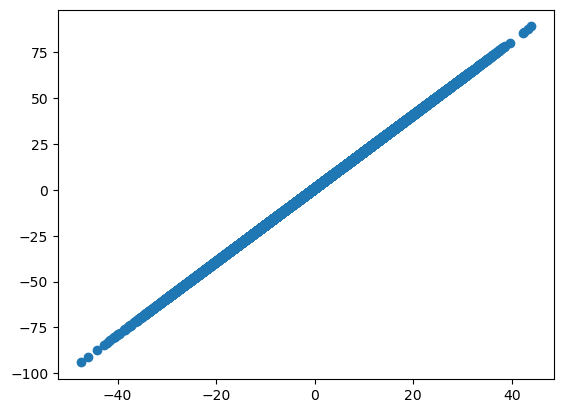

In [234]:
# plot data
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train)

In [235]:
# define model
# 无参数的全连接层
import torch
import torch.nn as nn


class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [236]:
# define model params
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model=model.to(device)
x_train=x_train.to(device)
y_train=y_train.to(device)
x_train,y_train,model

cpu


(tensor([[-0.5901],
         [ 4.9100],
         [-7.3295],
         ...,
         [12.1403],
         [ 1.3269],
         [-4.3868]]),
 tensor([[ -0.1802],
         [ 10.8201],
         [-13.6591],
         ...,
         [ 25.2806],
         [  3.6537],
         [ -7.7736]]),
 LinearRegressionModel(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ))

In [237]:
# define params
epochs = 300000
learning_rate = 0.005
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # SGD优化器
criterion = nn.MSELoss()  # loss函数，使用MSE


In [238]:
# train
import time

begin = time.perf_counter()

for epoch in range(epochs):
    # 前向传播
    outputs = model(x_train)

    # 计算损失函数
    loss = criterion(outputs, y_train)

    # 梯度清零
    optimizer.zero_grad()

    # 反向传播
    loss.backward()

    # 更新权重
    optimizer.step()
    if epoch % 1000 == 0:
        print(f"epoch={epoch}/{epochs},loss={loss.data}")

end = time.perf_counter()
print(f"cost={end - begin}")

epoch=0/300000,loss=354.6317138671875
epoch=1000/300000,loss=2.6244384443430135e-09
epoch=2000/300000,loss=7.404233476338007e-12
epoch=3000/300000,loss=7.404233476338007e-12
epoch=4000/300000,loss=7.404233476338007e-12


KeyboardInterrupt: 

In [ ]:
model.eval()  # set as pred mode(else train mode)
# predict
predict = model(x_train)
print(predict)
# plot
plt.scatter(x_train, y_train, c="r")
plt.plot(x_train, predict.detach().numpy())
plt.show()